In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

import keras
from keras.models import Sequential
from keras.layers import  Dense, Dropout,Activation, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, Adamax

#tensorflow
import tensorflow as tf


In [2]:
Forestfires= pd.read_csv('forestfires.csv')

In [3]:
df= Forestfires.copy()

In [4]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
df1= df.drop(labels=['month', 'day'], axis=1)
df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [7]:
features= df1.columns
print(features)

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')


In [8]:
features1= features[0:9]
print(features1)

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'], dtype='object')


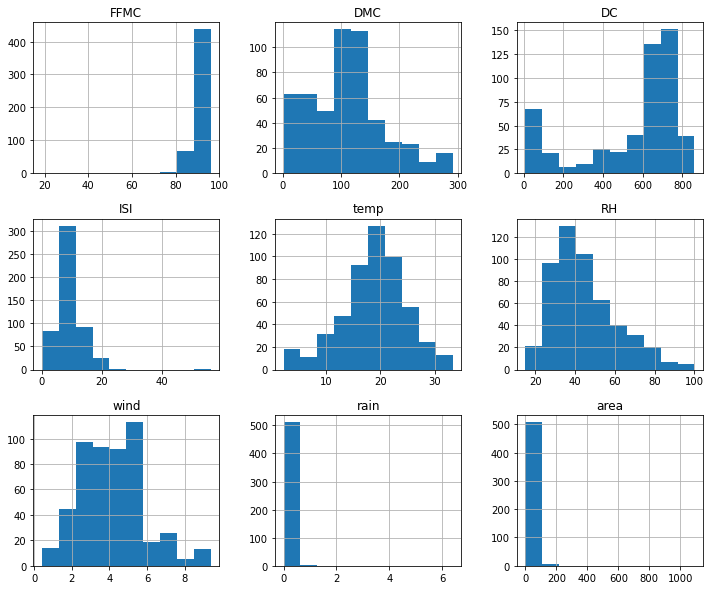

In [9]:
df1[features1].hist(figsize=(12,10))
plt.show()

In [10]:
for feature in features1:
  unique_values_count= len(df1[feature].unique())
  unique_values= df1[feature].unique()
  print('The {} has {} unique values as {}....'.format(feature, unique_values_count, unique_values[0:5]))

The FFMC has 106 unique values as [86.2 90.6 91.7 89.3 92.3]....
The DMC has 215 unique values as [26.2 35.4 43.7 33.3 51.3]....
The DC has 219 unique values as [ 94.3 669.1 686.9  77.5 102.2]....
The ISI has 119 unique values as [ 5.1  6.7  9.   9.6 14.7]....
The temp has 192 unique values as [ 8.2 18.  14.6  8.3 11.4]....
The RH has 75 unique values as [51 33 97 99 29]....
The wind has 21 unique values as [6.7 0.9 1.3 4.  1.8]....
The rain has 7 unique values as [0.  0.2 1.  6.4 0.8]....
The area has 251 unique values as [0.   0.36 0.43 0.47 0.55]....


In [11]:
scaler= MinMaxScaler()
df2= pd.DataFrame(scaler.fit_transform(df1[features1]))
df2.head()


,0,1,2,3,4,5,6,7,8
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0


In [12]:

df3= df1.iloc[:, 9:]
df3.head()

,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [13]:

final_df= pd.concat([df2,df3], axis=1 )
final_df.head()

,0,1,2,3,4,5,6,7,8,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [14]:
# converting the target feature into numerical one hot coded feature
final_df['size_category']= pd.get_dummies(final_df['size_category'],drop_first=True)

In [15]:
final_df.head()

,0,1,2,3,4,5,6,7,8,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [16]:
x= final_df.drop(labels=['size_category'], axis=1)
print(x)
y= final_df['size_category']
print(y)

            0         1         2         3         4         5         6  \
0    0.870968  0.086492  0.101325  0.090909  0.192926  0.423529  0.700000   
1    0.927742  0.118194  0.775419  0.119430  0.508039  0.211765  0.055556   
2    0.927742  0.146795  0.796294  0.119430  0.398714  0.211765  0.100000   
3    0.941935  0.110958  0.081623  0.160428  0.196141  0.964706  0.400000   
4    0.910968  0.172984  0.110590  0.171123  0.295820  0.988235  0.155556   
..        ...       ...       ...       ...       ...       ...       ...   
512  0.811613  0.191592  0.771315  0.033868  0.823151  0.200000  0.255556   
513  0.811613  0.191592  0.771315  0.033868  0.633441  0.658824  0.600000   
514  0.811613  0.191592  0.771315  0.033868  0.610932  0.647059  0.700000   
515  0.976774  0.499311  0.711622  0.201426  0.752412  0.317647  0.400000   
516  0.784516  0.006547  0.115867  0.019608  0.308682  0.188235  0.455556   

           7         8  dayfri  ...  monthdec  monthfeb  monthjan  monthjul

### Tuning Hyperparameters: Batch Size and epochs

In [17]:
# Create sequential model:
def base_model():
  model= Sequential()
  model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
  model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
  model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
  # output layer
  model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
  # optimizer 
  adam= Adam()
  # Compile model
  model.compile(loss= "binary_crossentropy", optimizer= adam, metrics= ['accuracy'])
  return model

# Define clasification model
classifier= KerasClassifier(build_fn=base_model, verbose= 0)
# Define GridSearch Model
batch_size= [10, 20, 40, 100]
epochs= [10, 20, 50, 100]
# make a Dictionary to store grid parameters
grid_param= dict(batch_size=batch_size, epochs=epochs )
# Build & Fit the gridsearchCV
grid= GridSearchCV(estimator=classifier, param_grid=grid_param, cv= KFold(), verbose=10 )
grid_results= grid.fit(x,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END .................batch_size=10, epochs=10; total time=   2.9s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END .................batch_size=10, epochs=10; total time=   2.5s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END .................batch_size=10, epochs=10; total time=   2.7s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END .................batch_size=10, epochs=10; total time=   2.3s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END .................batch_size=10, epochs=10; total time=   2.3s
[CV 1/5; 2/16] START batch_size=10, epochs=20...................................
[CV 1/5; 2/16] END .................batch_size=1

In [18]:
# summerize results
print('Best:{}, using {}'.format(grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:0.8429425001144409, using {'batch_size': 10, 'epochs': 100}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 10, 'epochs': 10}
0.728659451007843,0.1510055827692834 with: {'batch_size': 10, 'epochs': 20}
0.7287341356277466,0.13642476744278526 with: {'batch_size': 10, 'epochs': 50}
0.8429425001144409,0.11570934012473727 with: {'batch_size': 10, 'epochs': 100}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 20, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 20, 'epochs': 20}
0.7209671378135681,0.1378870136506599 with: {'batch_size': 20, 'epochs': 50}
0.7655339717864991,0.12161845510178099 with: {'batch_size': 20, 'epochs': 100}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 20}
0.7267363667488098,0.14768493445160774 with: {'batch_size': 40, 'epochs': 50}
0.7113330841064454,0.12556573610208127 with: {'batch_size': 40, 'epochs': 100}

### Tuning hyperparameter: Learning rate and dropout rate

In [19]:
# Create sequential model:
def base_model_lr_drate(learning_rate,dropout_rate):
  model= Sequential()
  model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
  model.add(Dropout(dropout_rate))
  # output layer
  model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
  # optimizer 
  adam= Adam(learning_rate=learning_rate)
  # Compile model
  model.compile(loss= "binary_crossentropy", optimizer= adam, metrics= ['accuracy'])
  return model

# Define clasification model
classifier= KerasClassifier(build_fn=base_model_lr_drate, verbose= 0, batch_size=10, epochs=100)
# Define GridSearch Model
learning_rate= [0.001, 0.01, 0.10, 0.2, 0.5]
dropout_rate= [0, 0.1, 0.2, 0.5]
# make a Dictionary to store grid parameters
grid_param= dict(learning_rate=learning_rate, dropout_rate=dropout_rate )
# Build & Fit the gridsearchCV
grid= GridSearchCV(estimator=classifier, param_grid=grid_param, cv= KFold(), verbose=10, return_train_score=True )
grid_results= grid.fit(x,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START dropout_rate=0, learning_rate=0.001........................
[CV 1/5; 1/20] END ......dropout_rate=0, learning_rate=0.001; total time=   9.0s
[CV 2/5; 1/20] START dropout_rate=0, learning_rate=0.001........................
[CV 2/5; 1/20] END ......dropout_rate=0, learning_rate=0.001; total time=   9.0s
[CV 3/5; 1/20] START dropout_rate=0, learning_rate=0.001........................
[CV 3/5; 1/20] END ......dropout_rate=0, learning_rate=0.001; total time=   8.9s
[CV 4/5; 1/20] START dropout_rate=0, learning_rate=0.001........................
[CV 4/5; 1/20] END ......dropout_rate=0, learning_rate=0.001; total time=   8.9s
[CV 5/5; 1/20] START dropout_rate=0, learning_rate=0.001........................
[CV 5/5; 1/20] END ......dropout_rate=0, learning_rate=0.001; total time=   9.2s
[CV 1/5; 2/20] START dropout_rate=0, learning_rate=0.01.........................
[CV 1/5; 2/20] END .......dropout_rate=0, learn

In [20]:
# summerize results
print('Best:{}, using {}'.format(grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:0.8839245676994324, using {'dropout_rate': 0, 'learning_rate': 0.01}
0.8082710981369019,0.11455576354449291 with: {'dropout_rate': 0, 'learning_rate': 0.001}
0.8839245676994324,0.02927492310537249 with: {'dropout_rate': 0, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0, 'learning_rate': 0.2}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0, 'learning_rate': 0.5}
0.7985436797142029,0.0919867221556611 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.8509148597717285,0.04473706666276417 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.2}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.5}
0.74994398355484,0.15363614186552366 with

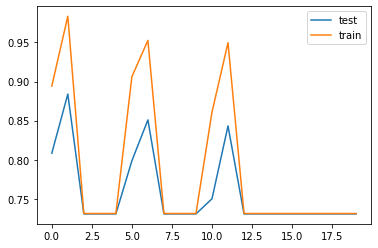

In [21]:
# plotting train test plot
test_scores= grid_results.cv_results_['mean_test_score']
train_scores=grid_results.cv_results_['mean_train_score']

plt.plot(test_scores, label='test')
plt.plot(train_scores, label= 'train')
plt.legend(loc='best')
plt.show()

### Tuning hyperparameter: Activation function and Kernal initializer

In [22]:
# Create sequential model:
def base_model_af_init(init,activation_function):
  model= Sequential()
  model.add(Dense(12, input_dim=28, kernel_initializer=init, activation=activation_function))
  model.add(Dropout(0.1))
  model.add(Dense(8, kernel_initializer=init, activation=activation_function))
  model.add(Dropout(0.1))
  model.add(Dense(8, kernel_initializer=init, activation=activation_function))
  model.add(Dropout(0.1))
  # output layer
  model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
  # optimizer 
  adam= Adam(learning_rate=0.01)
  # Compile model
  model.compile(loss= "binary_crossentropy", optimizer= adam, metrics= ['accuracy'])
  return model

# Define clasification model
classifier= KerasClassifier(build_fn=base_model_af_init, verbose= 0, batch_size=10, epochs=100)
# Define GridSearch Model
init= ['uniform', 'normal', 'zero']
activation_function= ['relu', 'sigmoid', 'tanh', 'linear', 'softmax']
# make a Dictionary to store grid parameters
grid_param= dict(init=init, activation_function=activation_function )
# Build & Fit the gridsearchCV
grid= GridSearchCV(estimator=classifier, param_grid=grid_param, cv= KFold(), verbose=10, return_train_score=True )
grid_results= grid.fit(x,y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START activation_function=relu, init=uniform.....................
[CV 1/5; 1/15] END ...activation_function=relu, init=uniform; total time=   9.1s
[CV 2/5; 1/15] START activation_function=relu, init=uniform.....................
[CV 2/5; 1/15] END ...activation_function=relu, init=uniform; total time=   9.2s
[CV 3/5; 1/15] START activation_function=relu, init=uniform.....................
[CV 3/5; 1/15] END ...activation_function=relu, init=uniform; total time=   9.1s
[CV 4/5; 1/15] START activation_function=relu, init=uniform.....................
[CV 4/5; 1/15] END ...activation_function=relu, init=uniform; total time=   9.6s
[CV 5/5; 1/15] START activation_function=relu, init=uniform.....................
[CV 5/5; 1/15] END ...activation_function=relu, init=uniform; total time=   9.2s
[CV 1/5; 2/15] START activation_function=relu, init=normal......................
[CV 1/5; 2/15] END ....activation_function=relu,

In [23]:
# summerize results
print('Best:{}, using {}'.format(grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:0.947703504562378, using {'activation_function': 'linear', 'init': 'uniform'}
0.83342045545578,0.10499855963666252 with: {'activation_function': 'relu', 'init': 'uniform'}
0.8856796145439148,0.06899525157027317 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.8586631894111634,0.06767051591631748 with: {'activation_function': 'sigmoid', 'init': 'uniform'}
0.8547983765602112,0.07562137575487159 with: {'activation_function': 'sigmoid', 'init': 'normal'}
0.8625280022621155,0.08053998454288484 with: {'activation_function': 'sigmoid', 'init': 'zero'}
0.9012135863304138,0.062031540977702485 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9341859698295594,0.05244884727587475 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.947703504562378,0.02779761052815812 with: {'activation_

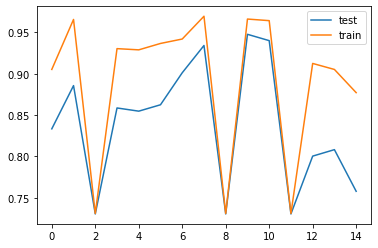

In [24]:
# plotting train test plot
test_scores= grid_results.cv_results_['mean_test_score']
train_scores=grid_results.cv_results_['mean_train_score']

plt.plot(test_scores, label='test')
plt.plot(train_scores, label= 'train')
plt.legend(loc='best')
plt.show()

### Tuning hyperparameter: Number of neurons in activation layer

In [25]:
# Create sequential model:
def base_model_num_neuron(neuron1,neuron2, neuron3):
  model= Sequential()
  model.add(Dense(neuron1, input_dim=28, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  model.add(Dense(neuron2, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  model.add(Dense(neuron3, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  # output layer
  model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
  # optimizer 
  adam= Adam(learning_rate=0.01)
  # Compile model
  model.compile(loss= "binary_crossentropy", optimizer= adam, metrics= ['accuracy'])
  return model

# Define clasification model
classifier= KerasClassifier(build_fn=base_model_num_neuron, verbose= 0, batch_size=10, epochs=100)
# Define GridSearch Model
neuron1= [2,8,16,25,30]
neuron2= [2,8,16,25,30]
neuron3= [2,8,16,25,30]
# make a Dictionary to store grid parameters
grid_param= dict(neuron1=neuron1, neuron2=neuron2, neuron3=neuron3)
# Build & Fit the gridsearchCV
grid= GridSearchCV(estimator=classifier, param_grid=grid_param, cv= KFold(), verbose=10, return_train_score=True )
grid_results= grid.fit(x,y)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5; 1/125] START neuron1=2, neuron2=2, neuron3=2...........................
[CV 1/5; 1/125] END .........neuron1=2, neuron2=2, neuron3=2; total time=   5.0s
[CV 2/5; 1/125] START neuron1=2, neuron2=2, neuron3=2...........................
[CV 2/5; 1/125] END .........neuron1=2, neuron2=2, neuron3=2; total time=   5.1s
[CV 3/5; 1/125] START neuron1=2, neuron2=2, neuron3=2...........................
[CV 3/5; 1/125] END .........neuron1=2, neuron2=2, neuron3=2; total time=   5.1s
[CV 4/5; 1/125] START neuron1=2, neuron2=2, neuron3=2...........................
[CV 4/5; 1/125] END .........neuron1=2, neuron2=2, neuron3=2; total time=   4.8s
[CV 5/5; 1/125] START neuron1=2, neuron2=2, neuron3=2...........................
[CV 5/5; 1/125] END .........neuron1=2, neuron2=2, neuron3=2; total time=   4.7s
[CV 1/5; 2/125] START neuron1=2, neuron2=2, neuron3=8...........................
[CV 1/5; 2/125] END .........neuron1=2, neuron

In [26]:
# summerize results
print('Best:{}, using {}'.format(grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:0.9670649647712708, using {'neuron1': 16, 'neuron2': 2, 'neuron3': 25}
0.9516243457794189,0.03717664003214942 with: {'neuron1': 2, 'neuron2': 2, 'neuron3': 2}
0.9361277103424073,0.03268284230692105 with: {'neuron1': 2, 'neuron2': 2, 'neuron3': 8}
0.9612770795822143,0.02369086337564917 with: {'neuron1': 2, 'neuron2': 2, 'neuron3': 16}
0.9554518342018128,0.02977944871198138 with: {'neuron1': 2, 'neuron2': 2, 'neuron3': 25}
0.9381254553794861,0.042799636366813 with: {'neuron1': 2, 'neuron2': 2, 'neuron3': 30}
0.9573748946189881,0.021771907016336963 with: {'neuron1': 2, 'neuron2': 8, 'neuron3': 2}
0.9418782711029052,0.03523857609261702 with: {'neuron1': 2, 'neuron2': 8, 'neuron3': 8}
0.9515869975090027,0.027369144042353973 with: {'neuron1': 2, 'neuron2': 8, 'neuron3': 16}
0.9420089483261108,0.03154348037283136 with: {'neuron1': 2, 'neuron2': 8, 'neuron3': 25}
0.9516243457794189,0.0334391492541235 with: {'neuron1': 2, 'neuron2': 8, 'neuron3': 30}
0.945817768573761,0.03316959224470333 w

### modeling with optimum hyperparameters:

In [27]:
# Create sequential model:
def base_model_optimized():
  model= Sequential()
  model.add(Dense(16, input_dim=28, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  model.add(Dense(16, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  model.add(Dense(8, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  # output layer
  model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
  # optimizer 
  adam= Adam(learning_rate=0.01)
  # Compile model
  model.compile(loss= "binary_crossentropy", optimizer= adam, metrics= ['accuracy'])
  return model

# Define clasification model
classifier= KerasClassifier(build_fn=base_model_optimized, verbose= 0, batch_size=10, epochs=100)
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=0)

history= classifier.fit(x_train,y_train, validation_split=0.25)

# predicting for validation set
y_predict= classifier.predict(x_test)

#printing the metrics
print(accuracy_score(y_test, y_predict))

0.9615384615384616


In [28]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix, precision_score, f1_score,recall_score
print('confusion matrix \n',confusion_matrix(y_test, y_predict))
print('precision_score:',precision_score(y_test, y_predict))
print('recall_score:   ',recall_score(y_test, y_predict))
print('f1_score:       ',f1_score(y_test, y_predict))

confusion matrix 
 [[33  4]
 [ 1 92]]
precision_score: 0.9583333333333334
recall_score:    0.989247311827957
f1_score:        0.9735449735449735


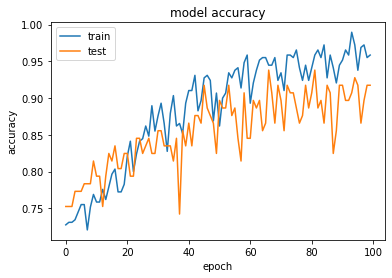

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

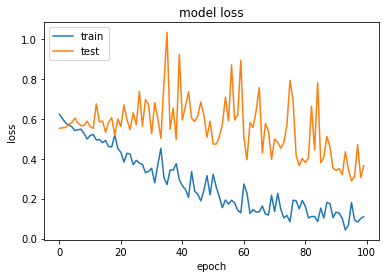

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()